In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, recall_score
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/creditcard.csv")

In [5]:
df.shape

(11959, 31)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,11959.0,8009.996822,6204.332248,0.000000,2542.000000,6662.000000,12382.000000,20642.000000
V1,11959.0,-0.216230,1.583914,-27.670569,-0.978944,-0.340742,1.161273,1.960497
V2,11959.0,0.277097,1.308884,-34.607649,-0.261503,0.256346,0.883626,9.092123
V3,11959.0,0.889505,1.331824,-22.804686,0.417186,0.951223,1.613678,4.101716
V4,11959.0,0.282606,1.478162,-4.657545,-0.622456,0.213029,1.159141,11.927512
V5,11959.0,-0.086585,1.191776,-32.092129,-0.688114,-0.183847,0.346298,34.099309
V6,11959.0,0.139986,1.306285,-23.496714,-0.622521,-0.146903,0.508432,21.393069
V7,11959.0,-0.121943,1.153899,-26.548144,-0.591335,-0.094876,0.431657,34.303177
V8,11959.0,-0.048727,1.246823,-23.632502,-0.185243,0.013616,0.267560,5.499963
V9,11959.0,0.911579,1.192349,-7.175097,0.196741,0.894911,1.589120,10.392889


In [8]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
# class = 1 --> Fraud
#class = 0 --> Not Fraud

#np.bincount(df['Class'])
df_cleaned = df.dropna(subset=['Class'])

# Now use np.bincount to get the counts of 0 and 1
counts = np.bincount(df_cleaned['Class'].astype(int))

print(f"Count of Not Fraud (0): {counts[0]}")
print(f"Count of Fraud (1): {counts[1]}")

Count of Not Fraud (0): 11906
Count of Fraud (1): 52


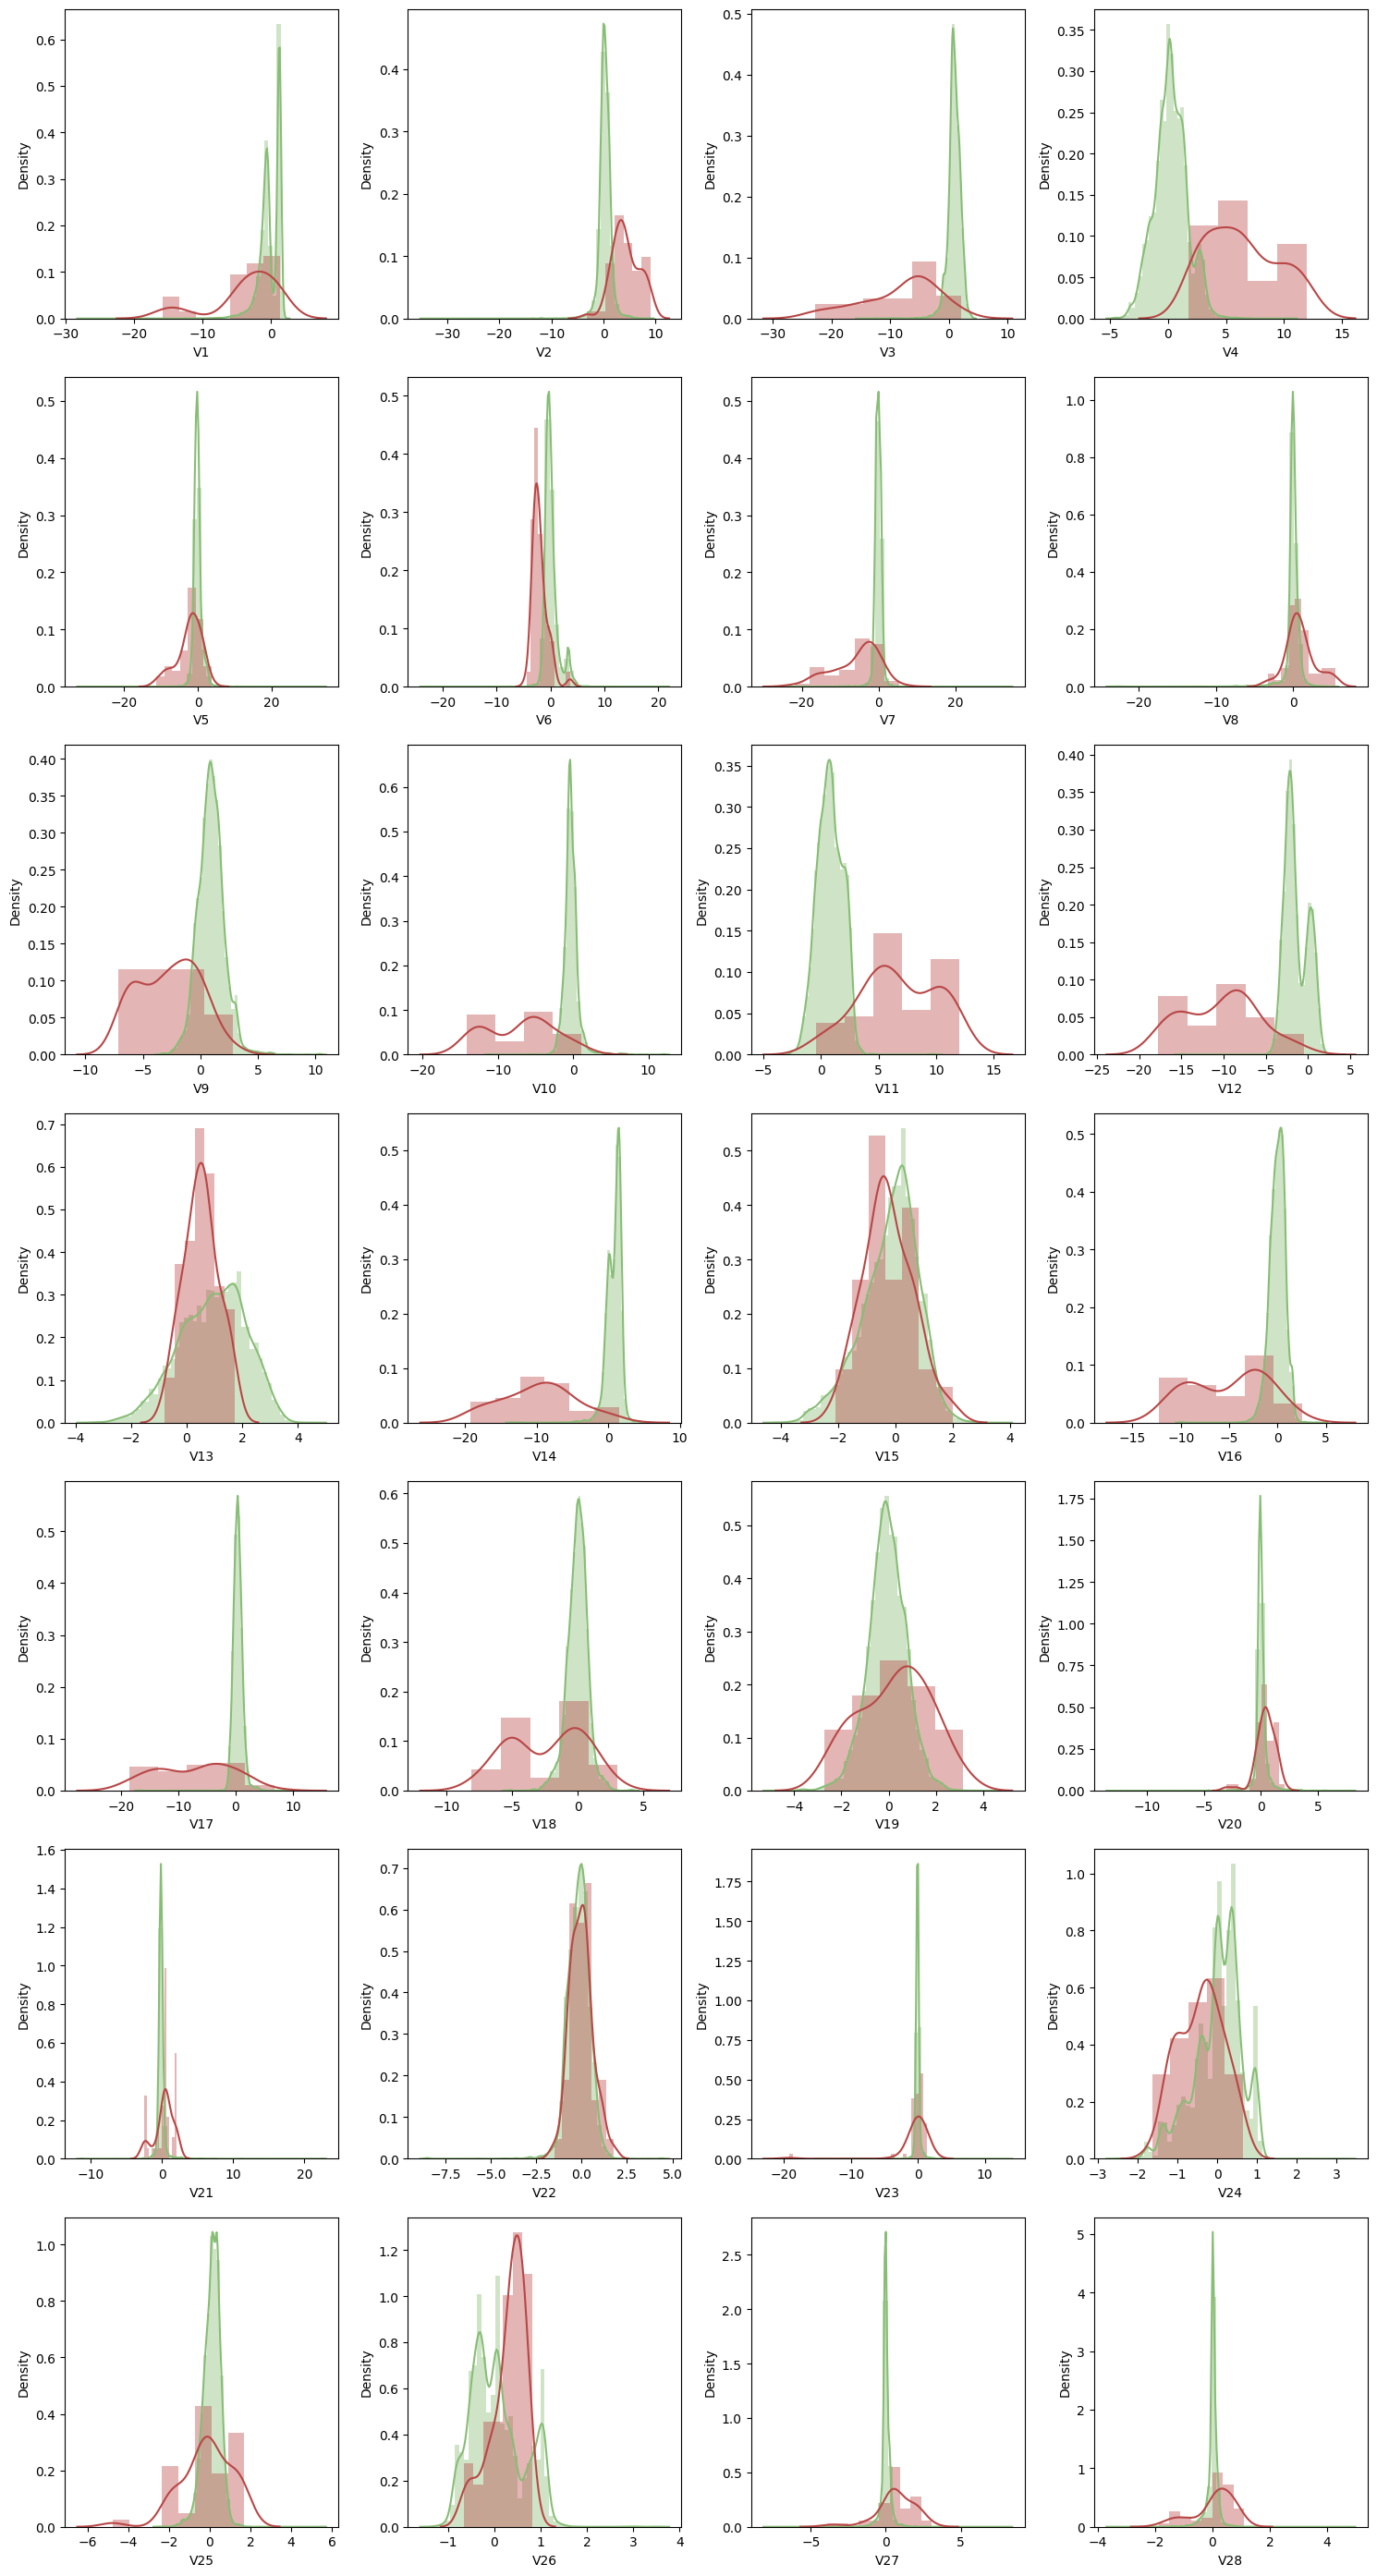

In [10]:
cols = df.columns.drop(['Time', 'Amount', 'Class'])

f, ax = plt.subplots(7, 4, figsize = (15, 28))

for i, c in zip(ax.flatten(), cols):
    sns.distplot(df[c][df['Class'] == 0], color = '#87bd75', ax = i)
    sns.distplot(df[c][df['Class'] == 1], color = '#b94646', ax = i)
f.tight_layout()

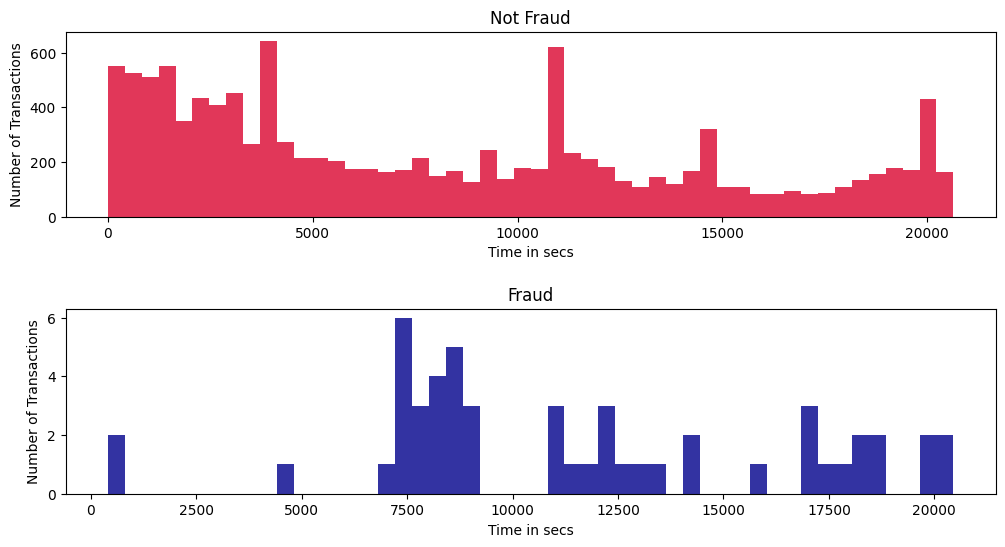

In [11]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(df['Time'][df['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)

ax1.set_xlabel('Time in secs')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(df["Time"][df['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)

ax2.set_xlabel('Time in secs')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

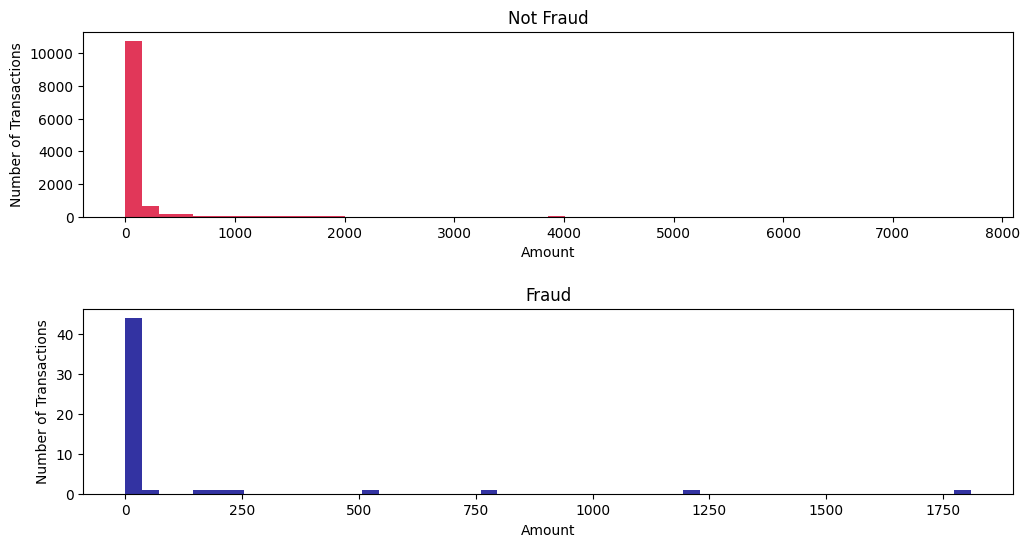

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (12, 6))
plt.subplots_adjust(hspace = 0.5)
ax1.hist(df['Amount'][df['Class'] == 0], bins = 50, color = 'crimson' ,alpha = 0.85)
ax1.set_xlabel('Amount')
ax1.set_title('Not Fraud')
ax1.set_ylabel('Number of Transactions')


ax2.hist(df["Amount"][df['Class'] == 1], bins = 50, color = 'darkblue', alpha = 0.8)
ax2.set_xlabel('Amount')
ax2.set_ylabel("Number of Transactions")
ax2.set_title('Fraud')
plt.show()

In [14]:
X = df.drop(['Time', 'Class'], axis = 1)
y = df['Class']

In [15]:
scaler = StandardScaler()
X['Amount'] = scaler.fit_transform(X[['Amount']])

In [16]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.489607
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.334733
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.774619
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.343063
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.042849


In [18]:
# Check and handle NaN in y
y = pd.Series(y)
if y.isnull().any():
    y.fillna(y.mode()[0], inplace=True)  # Replace NaN with the most common value

Class
0.0    11907
1.0       52
Name: count, dtype: int64


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, stratify = y_train)

In [20]:
def is_balanced_splitting(y):
    counts = np.bincount(y)
    return counts[1] / (sum(counts))

In [21]:
print('Percentage of FRAUD instances in Training Set : {}'.format(is_balanced_splitting(y_train) * 100))
print('Percentage of FRAUD instances in Testing Set : {}'.format(is_balanced_splitting(y_test) * 100))
print('Percentage of FRAUD instances in Validation set : {}'.format(is_balanced_splitting(y_valid) * 100))

Percentage of FRAUD instances in Training Set : 0.4442702208284333
Percentage of FRAUD instances in Testing Set : 0.4180602006688963
Percentage of FRAUD instances in Validation set : 0.41797283176593525


In [22]:
X_train.shape

(7653, 29)

In [25]:
from sklearn.impute import KNNImputer

# Use KNN imputer
imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)

### Oversampling

In [26]:
def oversampling(X_train, y_train):
# Oversampling the imbalanced dataset
    oversample = SMOTE(random_state = 42, sampling_strategy = 0.4)
    X, y = oversample.fit_resample(X_train, y_train)
    # summarize the new class distribution
    counter = Counter(y)
    print(counter)
    return X, y
    # scatter plot of examples by class label


In [27]:
X_train, y_train = oversampling(X_train, y_train)

Counter({0.0: 7619, 1.0: 3047})


Now, it's fairly balanced data

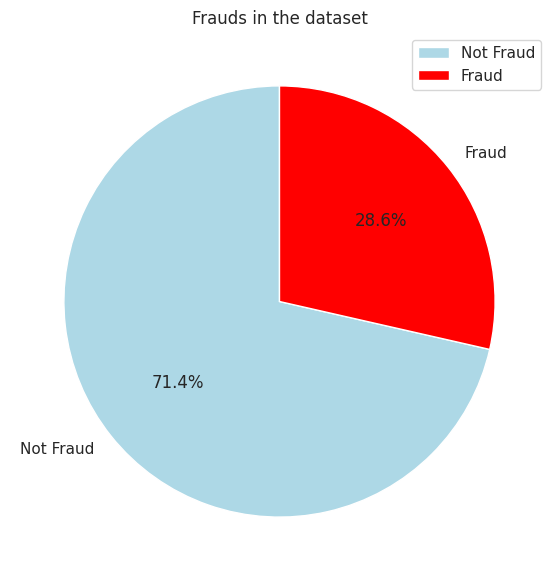

In [28]:
sns.set(style="whitegrid")
labels = ['Not Fraud', 'Fraud']
sizes = y_train.value_counts()

colors = ["lightblue","red"]


plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)

plt.title('Frauds in the dataset')
plt.legend()
plt.show()

### Adding Gaussian Noise

In [29]:
#Adding Gaussian Noise

def add_noise(X_train):
    mean = 0
    sigma = 0.1
    noise = np.random.normal(mean, sigma ,X_train.shape)
    X_train = X_train + noise
    return X_train

In [30]:
X_train_noised = add_noise(X_train)

In [31]:
y_train = np.array(y_train).reshape(-1, 1)
y_valid = np.array(y_valid).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [33]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

### Autoencoder Model

In [34]:
epochs = 25
batch_size = 128
input_shape = X_train.shape[1] #num of columns, 29
lr = 1e-7

#Autoencoder Model
input_layer = keras.layers.Input(shape=(input_shape, ))
encoder = keras.layers.Dense(128, activation = "relu", activity_regularizer = keras.regularizers.l1(lr),
                             kernel_initializer = 'lecun_normal')(input_layer)
encoder = keras.layers.Dense(64, activation = "relu")(encoder)
encoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(32, activation = 'relu')(encoder)
decoder = keras.layers.Dense(64, activation = 'relu')(decoder)
decoder = keras.layers.Dense(128, activation = 'relu')(decoder)
decoder = keras.layers.Dense(29, activation = 'relu')(decoder)
autoencoder = keras.Model(inputs=input_layer, outputs=decoder)

In [35]:
autoencoder.compile(metrics = ['accuracy'],
                    loss = 'mean_squared_error',
                    optimizer = 'adam')


history = autoencoder.fit(X_train_noised, X_train_noised,
                    epochs = epochs,
                    batch_size = batch_size,
                    shuffle = True,
                    validation_data = (X_valid, X_valid),
                    verbose=1).history

Epoch 1/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2065 - loss: 8.6703 - val_accuracy: 0.4065 - val_loss: 1.0572
Epoch 2/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5950 - loss: 7.7761 - val_accuracy: 0.6327 - val_loss: 0.9489
Epoch 3/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7249 - loss: 7.6546 - val_accuracy: 0.7001 - val_loss: 0.9138
Epoch 4/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7707 - loss: 7.8447 - val_accuracy: 0.7409 - val_loss: 0.8991
Epoch 5/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7970 - loss: 7.2939 - val_accuracy: 0.7618 - val_loss: 0.8781
Epoch 6/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8142 - loss: 7.4455 - val_accuracy: 0.7832 - val_loss: 0.8707
Epoch 7/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8338 - loss: 7.4480 - val_accuracy: 0.8009 - val_loss: 0.8639
Epoch 8/25
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8454 - loss: 7.3686 - val_accuracy: 0.8036 - val_loss:

In [36]:
denoised_data = autoencoder.predict(X_train_noised)

334/334 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


### Fraud Detector Model

In [37]:
epochs = 25
batch_size = 256
input_shape = X_train.shape[1] #num of columns, 29


input_layer = keras.layers.Input(shape = (input_shape, ))
layer_1 = keras.layers.Dense(128, activation = "relu",
                            kernel_initializer = 'lecun_normal')(input_layer)
layer_2 = keras.layers.Dense(64, activation = "relu", kernel_initializer = 'lecun_normal')(layer_1)
layer_3 = keras.layers.Dense(32, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_2)
layer_4 = keras.layers.Dense(16, activation = 'relu', kernel_initializer = 'lecun_normal')(layer_3)
output_layer = keras.layers.Dense(2, activation = 'sigmoid')(layer_4)
fraud_dtr = keras.Model(inputs = input_layer, outputs = output_layer)

In [39]:
fraud_dtr.compile(metrics=['accuracy'],
                    loss='binary_crossentropy',
                    optimizer='sgd')

callback = keras.callbacks.ModelCheckpoint('Fraud_Detector_model.keras',
                                          save_best_only = True)

history = fraud_dtr.fit(denoised_data, y_train,
                    epochs = epochs,
                    batch_size  = 256,
                    validation_data = (X_valid, y_valid),
                    callbacks = [callback]).history

Epoch 1/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8115 - loss: 0.6823 - val_accuracy: 0.9707 - val_loss: 0.6017
Epoch 2/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9733 - loss: 0.5531 - val_accuracy: 0.9963 - val_loss: 0.4907
Epoch 3/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9720 - loss: 0.4319 - val_accuracy: 0.9974 - val_loss: 0.3690
Epoch 4/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9708 - loss: 0.3052 - val_accuracy: 0.9958 - val_loss: 0.2591
Epoch 5/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9720 - loss: 0.2084 - val_accuracy: 0.9943 - val_loss: 0.1912
Epoch 6/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9697 - loss: 0.1578 - val_accuracy: 0.9906 - val_loss: 0.1523
Epoch 7/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9735 - loss: 0.1251 - val_accuracy: 0.9885 - val_loss: 0.1300
Epoch 8/25
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9715 - loss: 0.1115 - val_accuracy: 0.9859 - val_loss:

In [41]:
#Load the best saved model

model = keras.models.load_model('Fraud_Detector_model.keras')

In [42]:
model.evaluate(X_test, y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9619 - loss: 0.0915


[0.08301045000553131, 0.9711538553237915]

In [43]:
preds = model.predict(X_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### ROC-AUC Curve

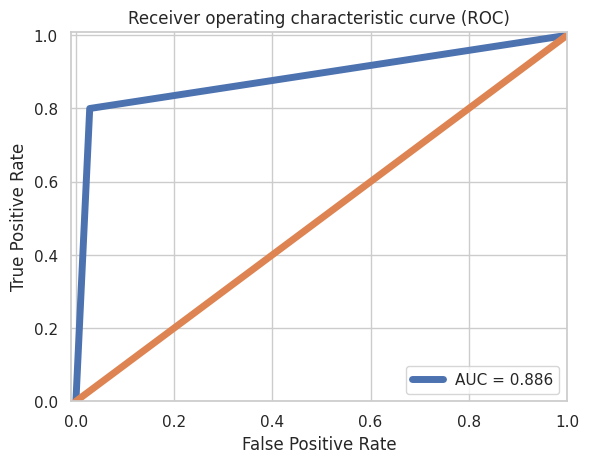

In [44]:
#Plotting the ROC-AUC Curve

false_pos_rate, true_pos_rate, thresholds = roc_curve(y_test.argmax(axis = 1), preds.argmax(axis = 1))
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth = 5, label = 'AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth = 5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix accuracy is not meaningful for unbalanced classification.

In [45]:
print('Percentage of correctly predicting the Fraud Transactions : ', recall_score(y_test.argmax(axis = 1), preds.argmax(axis = 1)) * 100, '%')

Percentage of correctly predicting the Fraud Transactions :  80.0 %
